True

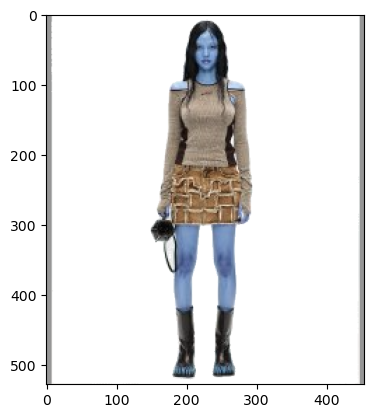

In [7]:
import sys, cv2
import numpy as np
from matplotlib import pyplot as plt
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "mps"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

image = cv2.imread(f'/Users/yoonkyeong/segment-anything/KakaoTalk_Photo_2024-03-31-22-04-23.png') # 사용하고자 하는 이미지 path
predictor.set_image(image)
h, w, _ = image.shape
input_point = np.array([[int(w/5), int(h/2)]])
input_label = np.array([1])

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

result_image = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)  # 4번째 차원 추가
result_image[:, :, :3] = image
result_image[:, :, 3] = (masks[1] == False).astype(np.uint8) * 255  # 마스크가 False인 부분을 투명하게 설정

plt.imshow(result_image)
cv2.imwrite('./real.png', result_image)


In [1]:
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt

sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "mps"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

# 입력 이미지가 있는 폴더 경로
input_folder = "/Users/yoonkyeong/Downloads/topwear"

# 출력 이미지를 저장할 폴더 경로
output_folder = "/Users/yoonkyeong/segment-anything/output"

# 입력 폴더에 있는 모든 이미지 파일에 대해 처리
for filename in os.listdir(input_folder):
    # 이미지 파일의 전체 경로
    image_path = os.path.join(input_folder, filename)
    
    # 이미지 불러오기
    image = cv2.imread(image_path)
    
    # Segment Anything 모델로 세그멘테이션 수행
    predictor.set_image(image)
    h, w, _ = image.shape
    input_point = np.array([[int(w/5), int(h/2)]])
    input_label = np.array([1])
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )
    
    # 결과 이미지 생성 (RGBA 형식)
    result_image = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)
    result_image[:, :, :3] = image
    result_image[:, :, 3] = (masks[1] == False).astype(np.uint8) * 255  # 투명 배경 설정
    
    # 출력 폴더에 저장할 이미지 경로 설정 (입력 이미지의 파일 이름 그대로 사용)
    output_path = os.path.join(output_folder, filename)
    
    # 결과 이미지 저장
    cv2.imwrite(output_path, result_image)

print("Segmentation and saving completed.")

KeyboardInterrupt: 

In [3]:
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt

sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "mps"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

# 입력 이미지가 있는 폴더 경로
input_folder = "/Users/yoonkyeong/Downloads/topwear"

# 출력 이미지를 저장할 폴더 경로
output_folder = "/Users/yoonkyeong/segment-anything/output"

# 입력 폴더에 있는 모든 이미지 파일에 대해 처리
for filename in os.listdir(input_folder):
    # 이미지 파일의 전체 경로
    image_path = os.path.join(input_folder, filename)
    
    # 이미지 불러오기
    image = cv2.imread(image_path)
    
    # Segment Anything 모델로 세그멘테이션 수행
    predictor.set_image(image)
    h, w, _ = image.shape
    input_point = np.array([[int(w/5), int(h/2)]])
    input_label = np.array([1])
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )
    
    # 결과 이미지 생성 (RGBA 형식)
    result_image = np.ones((image.shape[0], image.shape[1], 3), dtype=np.uint8) * 255  # 흰 배경으로 초기화
    
    # 세그멘테이션된 객체 영역을 그대로 표시
    result_image[masks[1]] = image[masks[1]]
    
    # 출력 폴더에 저장할 이미지 경로 설정 (입력 이미지의 파일 이름 그대로 사용)
    output_path = os.path.join(output_folder, filename)
    
    # 결과 이미지 저장
    cv2.imwrite(output_path, result_image)

print("Segmentation and saving completed.")


Segmentation and saving completed.


In [4]:
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt

sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "mps"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

# 입력 이미지가 있는 폴더 경로
input_folder = "/Users/yoonkyeong/Downloads/dress"

# 출력 이미지를 저장할 폴더 경로
output_folder = "/Users/yoonkyeong/segment-anything/output"

# 입력 폴더에 있는 모든 이미지 파일에 대해 처리
for filename in os.listdir(input_folder):
    # 이미지 파일의 전체 경로
    image_path = os.path.join(input_folder, filename)
    
    # 이미지 불러오기
    image = cv2.imread(image_path)
    
    # Segment Anything 모델로 세그멘테이션 수행
    predictor.set_image(image)
    h, w, _ = image.shape
    input_point = np.array([[int(w/5), int(h/2)]])
    input_label = np.array([1])
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )
    
    # 결과 이미지 생성 (RGBA 형식)
    result_image = np.ones((image.shape[0], image.shape[1], 3), dtype=np.uint8) * 255  # 흰 배경으로 초기화
    
    # 세그멘테이션된 객체 영역을 그대로 표시
    result_image[masks[1]] = image[masks[1]]
    
    # 출력 폴더에 저장할 이미지 경로 설정 (입력 이미지의 파일 이름 그대로 사용)
    output_path = os.path.join(output_folder, filename)
    
    # 결과 이미지 저장
    cv2.imwrite(output_path, result_image)

print("Segmentation and saving completed.")

Segmentation and saving completed.


In [12]:
import os
import cv2
import numpy as np
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "mps"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

# 입력 이미지가 있는 폴더 경로
input_folder = "/Users/yoonkyeong/Downloads/dress"

# 출력 이미지를 저장할 폴더 경로
output_folder = "/Users/yoonkyeong/segment-anything/new_output"

# 사용자로부터 입력 받은 텍스트
prompt_text = "top"

# 입력 폴더에 있는 모든 이미지 파일에 대해 처리
for filename in os.listdir(input_folder):
    # 이미지 파일의 전체 경로
    image_path = os.path.join(input_folder, filename)
    
    # 이미지 불러오기
    image = cv2.imread(image_path)

    # Segment Anything 모델로 세그멘테이션 수행을 위해 이미지 설정
    predictor.set_image(image)

    # Segment Anything 모델로 세그멘테이션 수행
    h, w, _ = image.shape
    input_point = np.array([[int(w/5), int(h/2)]])
    input_label = np.array([1])
    masks, scores, logits = predictor.predict(
        prompt=prompt_text,
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
        )

    
    # 결과 이미지 생성 (RGBA 형식)
    result_image = np.ones((image.shape[0], image.shape[1], 3), dtype=np.uint8) * 255  # 흰 배경으로 초기화
    
    # 세그멘테이션된 객체 영역을 그대로 표시
    result_image[masks[1]] = image[masks[1]]
    
    # 출력 폴더에 저장할 이미지 경로 설정 (입력 이미지의 파일 이름 그대로 사용)
    output_path = os.path.join(output_folder, filename)
    
    # 결과 이미지 저장
    cv2.imwrite(output_path, result_image)

print("Segmentation and saving completed.")


TypeError: SamPredictor.predict() got an unexpected keyword argument 'prompt'

In [14]:
import os
import cv2
import numpy as np
from segment_anything import sam_model_registry, SamPredictor

# SAM 모델 설정
sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "mps"

# SAM 모델 및 예측기 설정
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

# 입력 이미지 폴더 경로
input_folder = "/Users/yoonkyeong/Downloads/dress"

# 출력 이미지 저장 경로
output_folder = "/Users/yoonkyeong/segment-anything/new_output"

# 사용자 입력 텍스트 (선택 사항)
prompt_text = "describe the image"

# 입력 이미지 폴더에 있는 각 이미지에 대해 처리
for filename in os.listdir(input_folder):
    # 이미지 파일의 전체 경로
    image_path = os.path.join(input_folder, filename)
    
    # 이미지 불러오기
    image = cv2.imread(image_path)

    # Segment Anything 모델로 세그멘테이션 수행을 위해 이미지 설정
    predictor.set_image(image)
    
    # SAM 모델을 사용하여 세그멘테이션 수행
    masks, scores, logits = predictor.predict(image=image)
    
    # 배경 제외 및 가장 큰 객체 세그멘트
    largest_object_mask = masks[1]  # 객체 중 가장 큰 마스크 선택
    result_image = np.zeros_like(image)  # 결과 이미지 초기화
    result_image[largest_object_mask] = image[largest_object_mask]  # 가장 큰 객체 부분만 추출
    
    # 출력 이미지 경로 설정
    output_path = os.path.join(output_folder, filename)
    
    # 결과 이미지 저장
    cv2.imwrite(output_path, result_image)

print("Segmentation and saving completed.")


TypeError: SamPredictor.predict() got an unexpected keyword argument 'image'

In [17]:
import os
import cv2
import numpy as np
from segment_anything import sam_model_registry, SamPredictor

# SAM 모델 설정
sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "mps"

# SAM 모델 및 예측기 설정
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

# 입력 이미지 폴더 경로
input_folder = "/Users/yoonkyeong/Downloads/dress"

# 출력 이미지 저장 경로
output_folder = "/Users/yoonkyeong/segment-anything/new_output"

# 사용자 입력 텍스트 (선택 사항)
prompt_text = "describe the image"

# 입력 이미지 폴더에 있는 각 이미지에 대해 처리
for filename in os.listdir(input_folder):
    # 이미지 파일의 전체 경로
    image_path = os.path.join(input_folder, filename)
    
    # 이미지 불러오기
    image = cv2.imread(image_path)

    # Segment Anything 모델로 세그멘테이션 수행을 위해 이미지 설정
    predictor.set_image(image)
    
    # SAM 모델을 사용하여 세그멘테이션 수행
    masks, scores, logits = predictor.predict()

    # 배경 제외 및 가장 큰 객체 세그멘트
    largest_object_mask = masks[1]  # 객체 중 가장 큰 마스크 선택
    
    # 세그멘테이션된 객체 영역을 표시하고 나머지 부분은 흰 배경으로 설정
    result_image = np.ones_like(image) * 255  # 흰 배경으로 초기화
    result_image[largest_object_mask] = image[largest_object_mask]  # 세그멘테이션된 객체 부분만 추출
    
    # 배경 부분을 흰색으로 설정
    result_image[~largest_object_mask] = [255, 255, 255]  # 배경 부분을 흰색으로 설정
    
    # 출력 폴더에 저장할 이미지 경로 설정 (입력 이미지의 파일 이름 그대로 사용)
    output_path = os.path.join(output_folder, filename)
    
    # 결과 이미지 저장
    cv2.imwrite(output_path, result_image)

print("Segmentation and saving completed.")


print("Segmentation and saving completed.")


Segmentation and saving completed.


In [19]:
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt

sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "mps"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

# 입력 이미지가 있는 폴더 경로
input_folder = "/Users/yoonkyeong/Downloads/topwear"

# 출력 이미지를 저장할 폴더 경로
output_folder = "/Users/yoonkyeong/segment-anything"

# 입력 폴더에 있는 모든 이미지 파일에 대해 처리
for filename in os.listdir(input_folder):
    # 이미지 파일의 전체 경로
    image_path = os.path.join(input_folder, filename)
    
    # 이미지 불러오기
    image = cv2.imread(image_path)
    
    # Segment Anything 모델로 세그멘테이션 수행
    predictor.set_image(image)
    h, w, _ = image.shape
    input_point = np.array([[int(w/5), int(h/2)]])
    input_label = np.array([1])
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )
    
    # 면적이 제일 넓은 부분 찾기
    largest_object_mask = masks[1]
    contours, _ = cv2.findContours(largest_object_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)
    mask = np.zeros_like(largest_object_mask)
    cv2.drawContours(mask, [max_contour], -1, (255), thickness=cv2.FILLED)
    
    # 결과 이미지 생성 (RGBA 형식)
    result_image = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)
    result_image[:, :, :3] = image
    result_image[:, :, 3] = mask  # 세그멘테이션된 객체 부분만 추출
    
    # 출력 폴더에 저장할 이미지 경로 설정 (입력 이미지의 파일 이름 그대로 사용)
    output_path = os.path.join(output_folder, filename)
    
    # 결과 이미지 저장
    cv2.imwrite(output_path, result_image)

print("Segmentation and saving completed.")


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - image data type = bool is not supported
>  - Expected Ptr<cv::UMat> for argument 'image'


In [21]:
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt

sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "mps"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

# 입력 이미지가 있는 폴더 경로
input_folder = "/Users/yoonkyeong/Downloads/topwear"

# 출력 이미지를 저장할 폴더 경로
output_folder = "/Users/yoonkyeong/segment-anything"

# 입력 폴더에 있는 모든 이미지 파일에 대해 처리
for filename in os.listdir(input_folder):
    # 이미지 파일의 전체 경로
    image_path = os.path.join(input_folder, filename)
    
    # 이미지 불러오기
    image = cv2.imread(image_path)
    
    # Segment Anything 모델로 세그멘테이션 수행
    predictor.set_image(image)
    h, w, _ = image.shape
    input_point = np.array([[int(w/5), int(h/2)]])
    input_label = np.array([1])
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )
    
    # 결과 이미지 생성 (RGBA 형식)
    result_image = np.ones((image.shape[0], image.shape[1], 3), dtype=np.uint8) * 255  # 흰 배경으로 초기화
    
    # 세그멘테이션된 객체 영역을 그대로 표시
    result_image[masks[1]] = image[masks[1]]
    
    # 출력 폴더에 저장할 이미지 경로 설정 (입력 이미지의 파일 이름 그대로 사용)
    output_path = os.path.join(output_folder, filename)
    
    # 결과 이미지 저장
    cv2.imwrite(output_path, result_image)

print("Segmentation and saving completed.")


RuntimeError: MPS backend out of memory (MPS allocated: 15.09 GB, other allocations: 2.36 GB, max allowed: 18.13 GB). Tried to allocate 1024.00 MB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).